In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Load Dataset

In [3]:
data = pd.read_csv('Wine_clust.csv')

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.shape

(178, 13)

In [7]:
### Data preprocessng

In [8]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
# KMeans

In [9]:
### Finding Optimum number of clusters

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

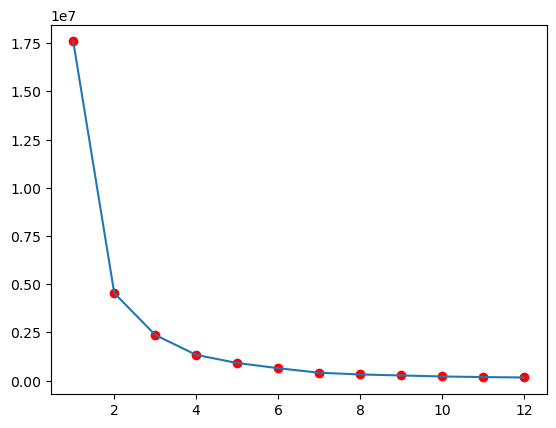

In [12]:
plt.plot(range(1,13),wcss)
plt.scatter(range(1,13),wcss, marker='o', color='red')

In [34]:
data1 = data.iloc[:, 1:].values

In [35]:
### Fitting the Model to the Data

In [36]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data1)

In [37]:
y_kmeans

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2])

In [ ]:
### silhoutte score of KMeans

In [47]:
from sklearn.metrics import silhouette_score
sil_kmeans = silhouette_score(data,y_kmeans)

In [48]:
sil_kmeans

0.5572288268257268

In [49]:
# Agglomerative Hierarchical Clustering

In [50]:
import scipy.cluster.hierarchy as sch

In [ ]:
### Plotting dendrogram for finding clusters

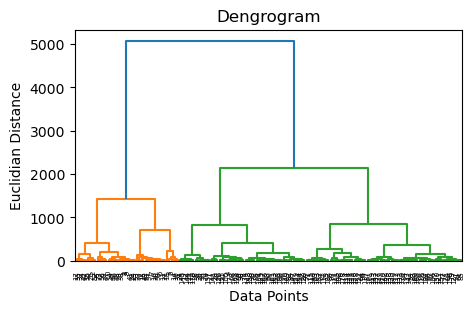

In [115]:
dendogram = sch.dendrogram(sch.linkage(data1, method='ward'))
plt.title("Dengrogram")
plt.xlabel('Data Points')
plt.ylabel('Euclidian Distance')
plt.show()

In [116]:
from sklearn.cluster import AgglomerativeClustering

In [117]:
### Fitiing Model to the Data

In [158]:
ahc = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage='ward')
y_ahc=ahc.fit_predict(data1)

In [159]:
y_ahc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [160]:
### silhoutte score of AHC

In [161]:
sil_ahc = silhouette_score(data,y_ahc)

In [162]:
sil_ahc

0.6587292996216912

In [98]:
# DBSCAN Clustering

In [99]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [166]:
### Standardise the feature variables

In [168]:
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:].values)

In [178]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

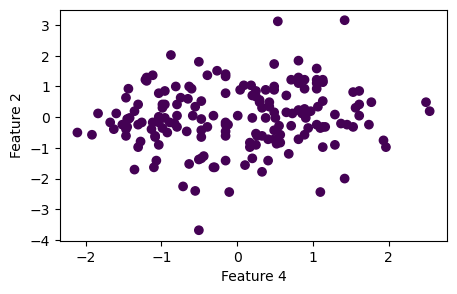

In [179]:
plt.scatter(X[:, 4], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 4')
plt.ylabel('Feature 2')
plt.show()